In [107]:
# 판다스,시본,맵플로립,데이터 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('supermarket.csv')

In [ ]:
# Invoice ID : 자동 생성 식별 번호
# Branch : 지사 명
# City : 마켓이 위치한 도시 이름
# Customer type :
  # Member : 회원카드 사용
  # Normal : 회원카드 미사용
# Gender : 성별
# Product line: 품목 분류
# Unit price : 단가
# Quantity : 수량
# Tax 5% : 세금 5% *
# Total : 전체 금액
# Date : 날짜
# Time : 시간
# Payment : 결제방법
# cogs : 매출원가
# gross margin percentage : 이익률 *
# gross income : 이익
# Rating : 고객에 평가한 쇼핑경험에 대한 점수(1~10)

In [37]:
# 데이터 상위5개 목록 확인
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [38]:
# 데이타의 데이터타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [39]:
# '도시(city)'별 '전체금액(total)'의 합
Total_sum = data.groupby('City',as_index = False).agg(Total_sum = ('Total', 'sum'))
Total_sum

,City,Total_sum
0,Mandalay,106197.6720
1,Naypyitaw,110568.7065
2,Yangon,106200.3705


Text(0, 0.5, 'Total_sum')

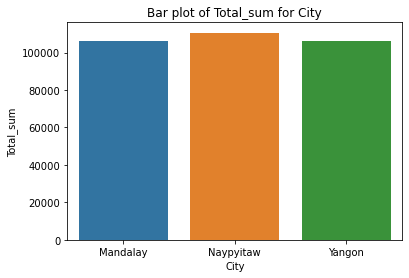

In [41]:
# '도시(city)'별 '전체금액(total)'의 합을 바그래프로 표현 
fig = plt.figure()                                           #피규어를 생성해서 x축은 City y축은 Total의합으로 지정하고 타이틀을 새로지정.
ax = plt.subplot()
sns.barplot(data = Total_sum, x = 'City', y = 'Total_sum')
ax.set_title('Bar plot of Total_sum for City')
ax.set_xlabel('City')
ax.set_ylabel('Total_sum') 

<AxesSubplot:xlabel='Total_1', ylabel='count'>

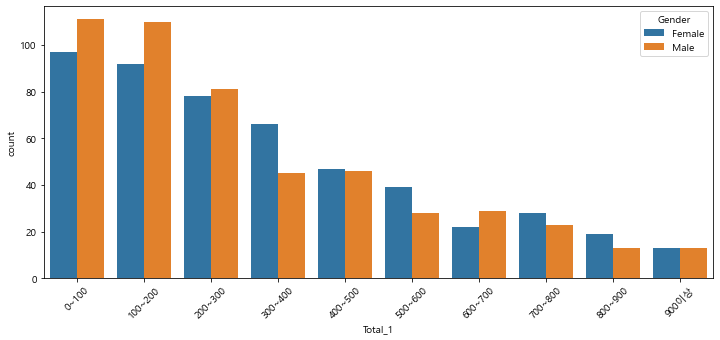

In [127]:
#성별(Gender)별 전체금액(Total) 구간별 그래프 
def Total_1(data):
    
    if data < 100:        
        return '0~100'
    elif data < 200:
        return '100~200'
    elif data < 300:
        return '200~300'
    elif data < 400:
        return '300~400'
    elif data < 500:
        return '400~500'
    elif data < 600:
        return '500~600'
    elif data < 700:
        return '600~700'
    elif data < 800:
        return '700~800'
    elif data < 900:
        return '800~900'
    else:
        return '900이상'
plt.rc('font', family='Malgun Gothic')    # 한글 폰트수정
plt.figure(figsize = (12, 5))  # 피규어 사이즈 확장 
plt.xticks(rotation=45)  # x라벨이 겹쳐서 글자 회전
data['Total_1'] = data['Total'].apply(Total_1)
sns.countplot(data = data.sort_values(by = 'Total_1'), x='Total_1', hue = 'Gender')

In [116]:
# 날짜 데이터 타입 생성
data['dt'] = pd.to_datetime(data['Date'], infer_datetime_format=False)
data['dt']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: dt, Length: 1000, dtype: datetime64[ns]

<AxesSubplot:xlabel='dt', ylabel='Total'>

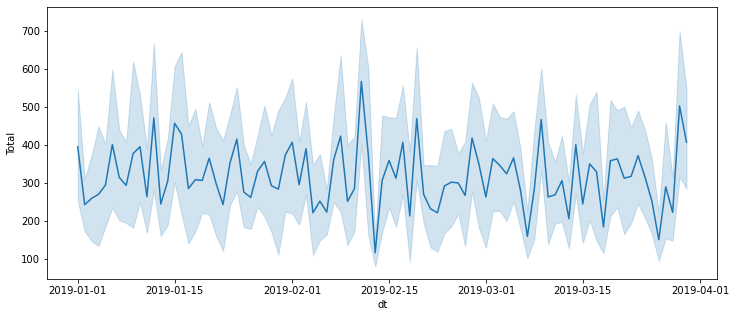

In [121]:
# 날짜별 전체금액 라인그래프로 표현
plt.figure(figsize = (12, 5))
sns.lineplot(data=data, x = 'dt', y = 'Total')

<AxesSubplot:xlabel='dt', ylabel='Rating'>

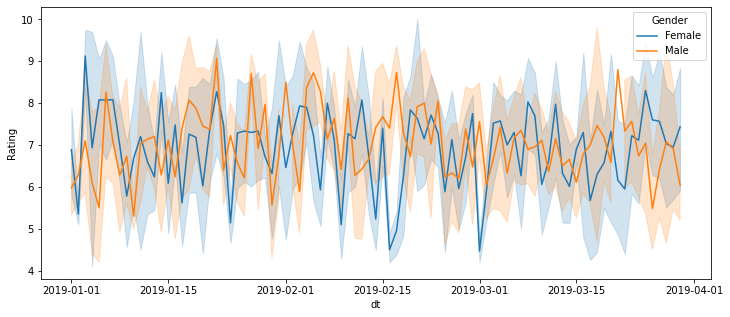

In [126]:
# 날짜별 평가점수 성별별 표현
plt.figure(figsize = (12, 5))
sns.lineplot(data=data, x = 'dt', y = 'Rating', hue = 'Gender')

<AxesSubplot:xlabel='dt', ylabel='Rating'>

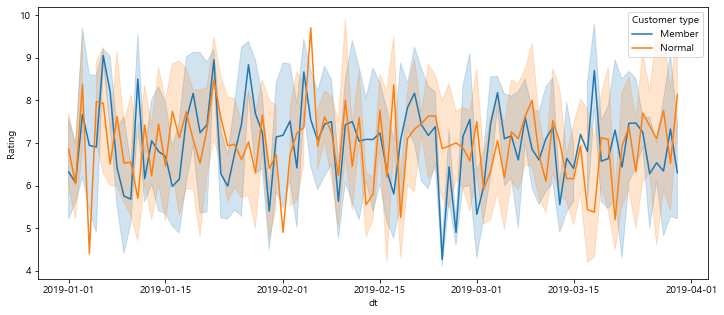

In [128]:
# 날짜별 회원카드사용 유무에 따른 평가점수
plt.figure(figsize = (12, 5))
sns.lineplot(data=data, x = 'dt', y = 'Rating', hue = 'Customer type')

<AxesSubplot:xlabel='City', ylabel='Rating'>

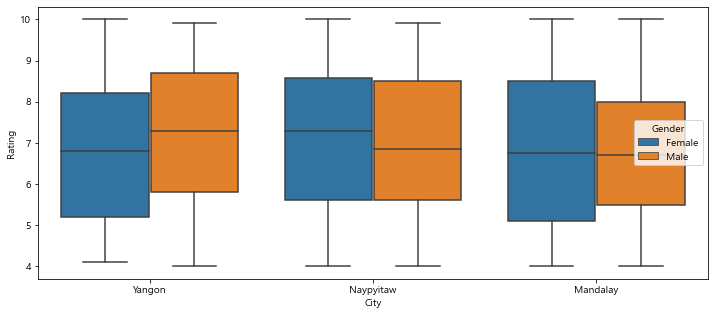

In [139]:
# 도시별 성별에 따른 평가점수 박스플롯으로 표현
plt.figure(figsize = (12, 5))
sns.boxplot(data=data, x = 'City', y = 'Rating', hue = 'Gender') 